#**INTRO**

In [3]:
#importing libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import numpy as np
import pathlib
import glob

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#assigning directory
directory=pathlib.Path("/content/drive/MyDrive/brain_tumor (1)/Training")

In [6]:
# Just needed in case you'd like to append it to an array
data = []

for filename in os.listdir("."):
    if filename.endswith("jpg"): 
        # Your code comes here such as 
        print(filename)
        data.append(filename)

In [7]:
#count of images in the directory given
image_count=len(list(directory.glob('*/*.jpg')))
#print(list(directory.glob('/*.jpg')))
image_count

3815

In [8]:
#creating dictionary of flower species
flower_images_dict={
    "glioma":list(directory.glob('glioma_tumor/*.jpg')),
    "meningioma":list(directory.glob('meningioma_tumor/*.jpg')),
    "no":list(directory.glob('no_tumor/*.jpg')),
    "pituitary":list(directory.glob('pituitary_tumor/*.jpg'))
}

In [9]:
#Different species list
keys=["glioma","meningioma","no","pituitary"]

In [10]:
#resizing and creating labels using computer vision
resized,labels=[],[]
for flower_name,images in flower_images_dict.items():
    for image in images:
        #print("completed")
        img=cv2.imread(str(image))
        resized_image=cv2.resize(img,(224,224))
        resized.append(resized_image)
        labels.append(keys.index(flower_name))
flower_images_dict

{'glioma': [PosixPath('/content/drive/MyDrive/brain_tumor (1)/Training/glioma_tumor/gg (1).jpg'),
  PosixPath('/content/drive/MyDrive/brain_tumor (1)/Training/glioma_tumor/gg (104).jpg'),
  PosixPath('/content/drive/MyDrive/brain_tumor (1)/Training/glioma_tumor/gg (10).jpg'),
  PosixPath('/content/drive/MyDrive/brain_tumor (1)/Training/glioma_tumor/gg (100).jpg'),
  PosixPath('/content/drive/MyDrive/brain_tumor (1)/Training/glioma_tumor/gg (101).jpg'),
  PosixPath('/content/drive/MyDrive/brain_tumor (1)/Training/glioma_tumor/gg (102).jpg'),
  PosixPath('/content/drive/MyDrive/brain_tumor (1)/Training/glioma_tumor/gg (103).jpg'),
  PosixPath('/content/drive/MyDrive/brain_tumor (1)/Training/glioma_tumor/gg (130).jpg'),
  PosixPath('/content/drive/MyDrive/brain_tumor (1)/Training/glioma_tumor/gg (114).jpg'),
  PosixPath('/content/drive/MyDrive/brain_tumor (1)/Training/glioma_tumor/gg (125).jpg'),
  PosixPath('/content/drive/MyDrive/brain_tumor (1)/Training/glioma_tumor/gg (110).jpg'),
  P

In [11]:
#function to print images
def print_image(i,j):
    plt.imshow(i)
    plt.title(keys[j])

In [12]:
#splitting data into train and test
#if any integer is given to random_state it will generate and give same set of data each time we run the code and if we give 
#None different sequences will be generated
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(resized,labels,test_size=0.25,random_state=0)

In [13]:
#normalizing data
x_train_scaled=np.array(x_train)/255
x_test_scaled=np.array(x_test)/255

In [14]:
x_train_scaled.shape

(2861, 224, 224, 3)

In [15]:
y_train=np.array(y_train)
y_train.shape

(2861,)

In [16]:
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        print("call")
        if(logs.get('accuracy') > .99):   
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(99))   
            self.model.stop_training = True
callbacks = myCallback()

In [17]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#**5.Cnn model with two different augmentation layers**


#**Adam**

In [16]:
model5=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(4,activation="softmax")
])
model5.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [17]:
history = model5.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100


90/90 [==============================] - 145s 2s/step - loss: 1.3278 - accuracy: 0.5187
Epoch 2/100
90/90 [==============================] - 136s 2s/step - loss: 0.7491 - accuracy: 0.7015
Epoch 3/100
90/90 [==============================] - 137s 2s/step - loss: 0.6358 - accuracy: 0.7672
Epoch 4/100
90/90 [==============================] - 140s 2s/step - loss: 0.5361 - accuracy: 0.8025
Epoch 5/100
90/90 [==============================] - 138s 2s/step - loss: 0.4658 - accuracy: 0.8291
Epoch 6/100
90/90 [==============================] - 136s 2s/step - loss: 0.4930 - accuracy: 0.8154
Epoch 7/100
90/90 [==============================] - 136s 2s/step - loss: 0.4005 - accuracy: 0.8525
Epoch 8/100
90/90 [==============================] - 136s 2s/step - loss: 0.3734 - accuracy: 0.8661
Epoch 9/100
90/90 [==============================] - 139s 2s/step - loss: 0.3517 - accuracy: 0.8731
Epoch 10/100
90/90 [==============================] - 137s 2s/step - loss: 0.3387 - accuracy: 0.8826
Epoch 11/10

In [18]:
model5.evaluate(x_test_scaled,np.array(y_test))

30/30 [==============================] - 12s 396ms/step - loss: 0.5412 - accuracy: 0.9025


[0.5411574244499207, 0.902515709400177]

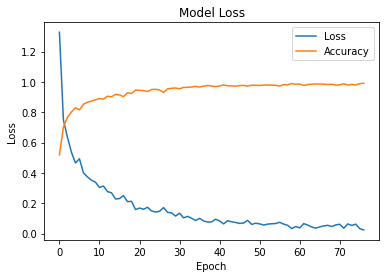

In [19]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

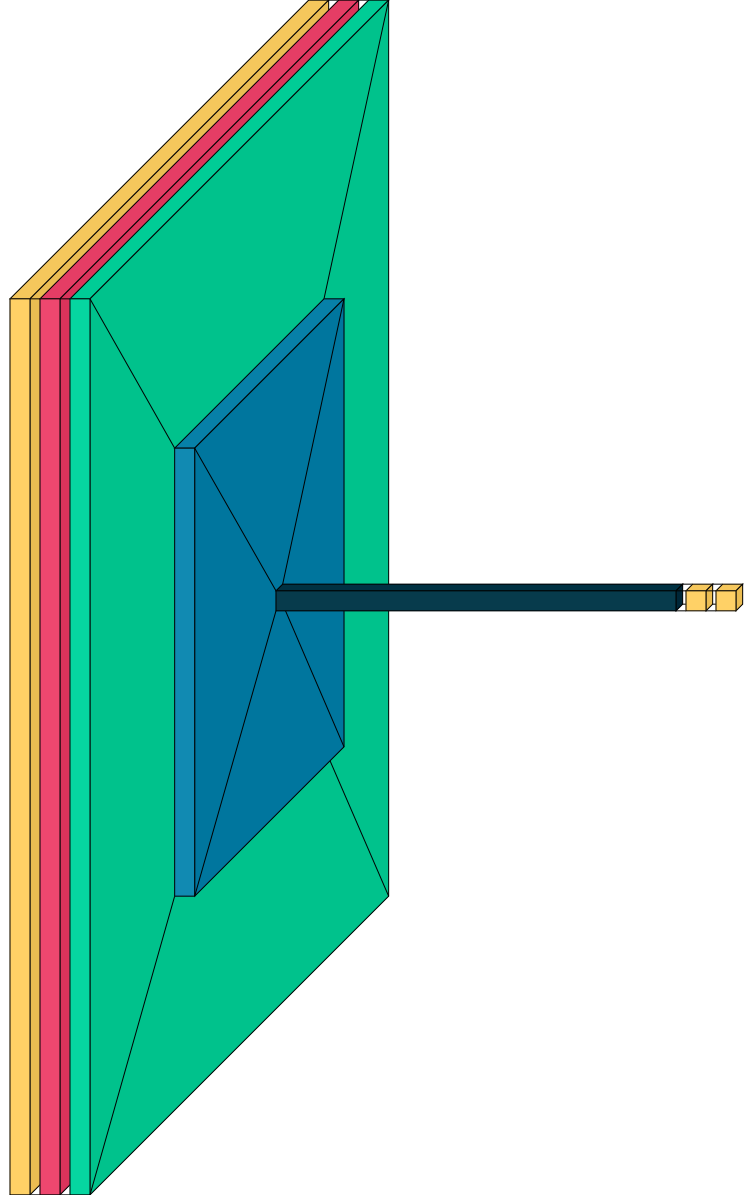

In [21]:
import visualkeras
visualkeras.layered_view(model5)

#**Adadelta**

In [22]:
model5_1=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(4,activation="softmax")
])
model5_1.compile(optimizer="adadelta",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [23]:
history = model5_1.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100


90/90 [==============================] - 177s 2s/step - loss: 1.3085 - accuracy: 0.3614
Epoch 2/100
90/90 [==============================] - 172s 2s/step - loss: 1.2807 - accuracy: 0.3614
Epoch 3/100
90/90 [==============================] - 173s 2s/step - loss: 1.2594 - accuracy: 0.3618
Epoch 4/100
90/90 [==============================] - 170s 2s/step - loss: 1.2430 - accuracy: 0.3614
Epoch 5/100
90/90 [==============================] - 161s 2s/step - loss: 1.2319 - accuracy: 0.3806
Epoch 6/100
90/90 [==============================] - 159s 2s/step - loss: 1.2173 - accuracy: 0.3775
Epoch 7/100
90/90 [==============================] - 161s 2s/step - loss: 1.2074 - accuracy: 0.3866
Epoch 8/100
90/90 [==============================] - 159s 2s/step - loss: 1.1949 - accuracy: 0.3988
Epoch 9/100
90/90 [==============================] - 163s 2s/step - loss: 1.1816 - accuracy: 0.4184
Epoch 10/100
90/90 [==============================] - 162s 2s/step - loss: 1.1810 - accuracy: 0.4282
Epoch 11/10

In [24]:
model5_1.evaluate(x_test_scaled,np.array(y_test))

30/30 [==============================] - 11s 360ms/step - loss: 1.0289 - accuracy: 0.5901


[1.0289247035980225, 0.5901467800140381]

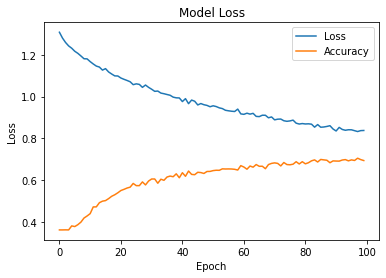

In [25]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

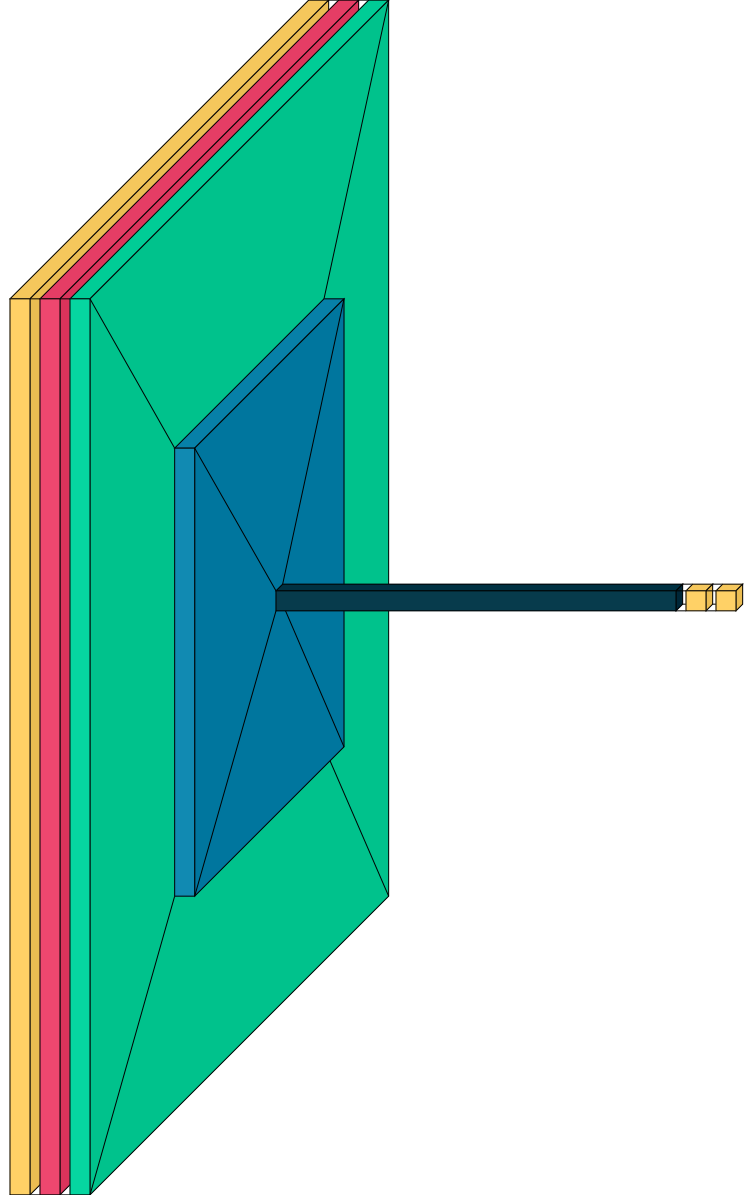

In [26]:
visualkeras.layered_view(model5_1)

#**Adagrad**

In [27]:
model5_2=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(4,activation="softmax")
])
model5_2.compile(optimizer="adagrad",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [28]:
history = model5_2.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100


90/90 [==============================] - 126s 1s/step - loss: 1.2818 - accuracy: 0.3674
Epoch 2/100
90/90 [==============================] - 122s 1s/step - loss: 1.2083 - accuracy: 0.4194
Epoch 3/100
90/90 [==============================] - 120s 1s/step - loss: 1.1411 - accuracy: 0.4883
Epoch 4/100
90/90 [==============================] - 124s 1s/step - loss: 1.0934 - accuracy: 0.5177
Epoch 5/100
90/90 [==============================] - 123s 1s/step - loss: 1.0615 - accuracy: 0.5393
Epoch 6/100
90/90 [==============================] - 122s 1s/step - loss: 1.0257 - accuracy: 0.5666
Epoch 7/100
90/90 [==============================] - 122s 1s/step - loss: 0.9886 - accuracy: 0.5876
Epoch 8/100
90/90 [==============================] - 124s 1s/step - loss: 0.9532 - accuracy: 0.6208
Epoch 9/100
90/90 [==============================] - 123s 1s/step - loss: 0.9229 - accuracy: 0.6386
Epoch 10/100
90/90 [==============================] - 122s 1s/step - loss: 0.8776 - accuracy: 0.6526
Epoch 11/10

In [29]:
model5_2.evaluate(x_test_scaled,np.array(y_test))

30/30 [==============================] - 12s 411ms/step - loss: 0.4711 - accuracy: 0.8239


[0.4710729718208313, 0.8238993883132935]

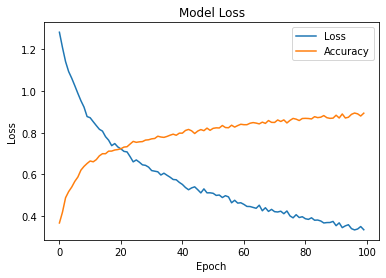

In [30]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

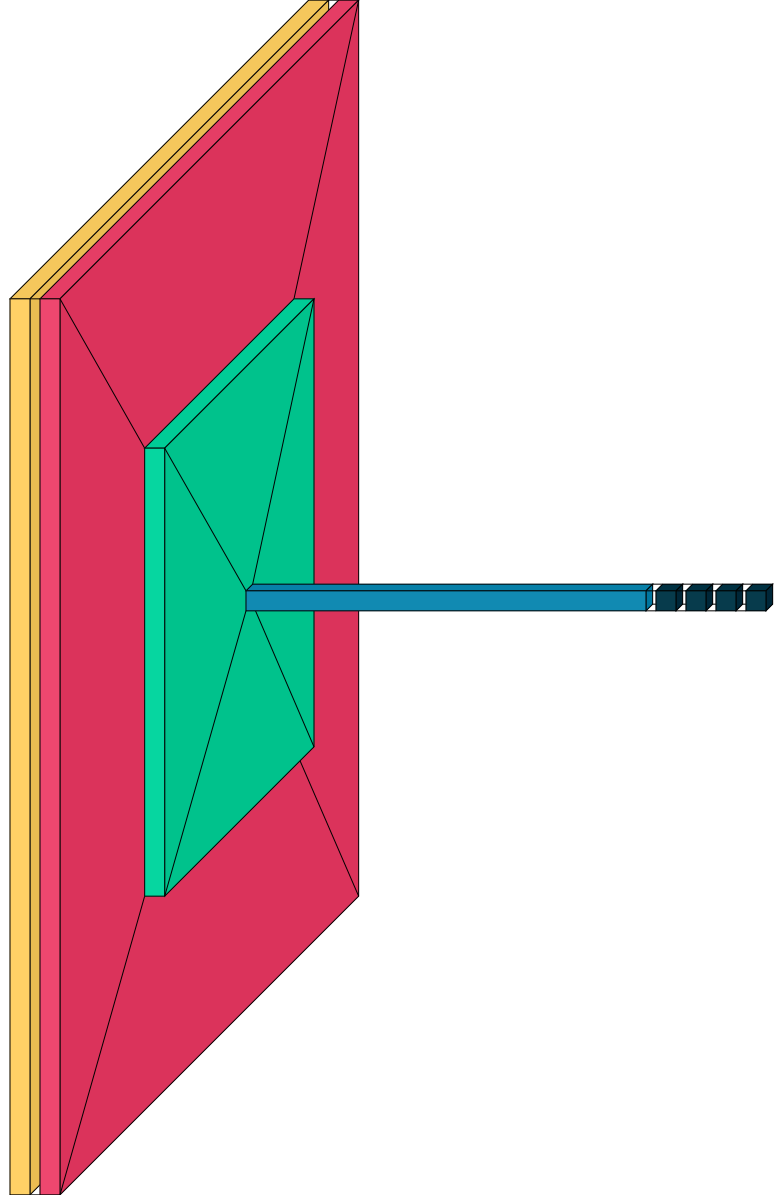

In [31]:
visualkeras.layered_view(model5_2)

#**Rmsprop**

In [16]:
model5_3=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(4,activation="softmax")
])
model5_3.compile(optimizer="RMSprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [17]:
history = model5_3.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100


90/90 [==============================] - 25s 94ms/step - loss: 1.3602 - accuracy: 0.4348
Epoch 2/100
90/90 [==============================] - 7s 76ms/step - loss: 0.9333 - accuracy: 0.6190
Epoch 3/100
90/90 [==============================] - 8s 93ms/step - loss: 0.7658 - accuracy: 0.6896
Epoch 4/100
90/90 [==============================] - 8s 86ms/step - loss: 0.6676 - accuracy: 0.7389
Epoch 5/100
90/90 [==============================] - 7s 82ms/step - loss: 0.6033 - accuracy: 0.7564
Epoch 6/100
90/90 [==============================] - 8s 92ms/step - loss: 0.5575 - accuracy: 0.7903
Epoch 7/100
90/90 [==============================] - 7s 77ms/step - loss: 0.5023 - accuracy: 0.8039
Epoch 8/100
90/90 [==============================] - 9s 102ms/step - loss: 0.5001 - accuracy: 0.8032
Epoch 9/100
90/90 [==============================] - 7s 77ms/step - loss: 0.4518 - accuracy: 0.8301
Epoch 10/100
90/90 [==============================] - 8s 93ms/step - loss: 0.4121 - accuracy: 0.8371
Epoch 11/

In [18]:
model5_3.evaluate(x_test_scaled,np.array(y_test))

30/30 [==============================] - 1s 18ms/step - loss: 1.0209 - accuracy: 0.8669


[1.0208650827407837, 0.8668763041496277]

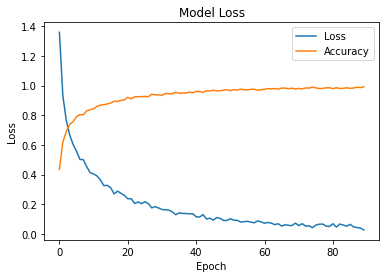

In [19]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

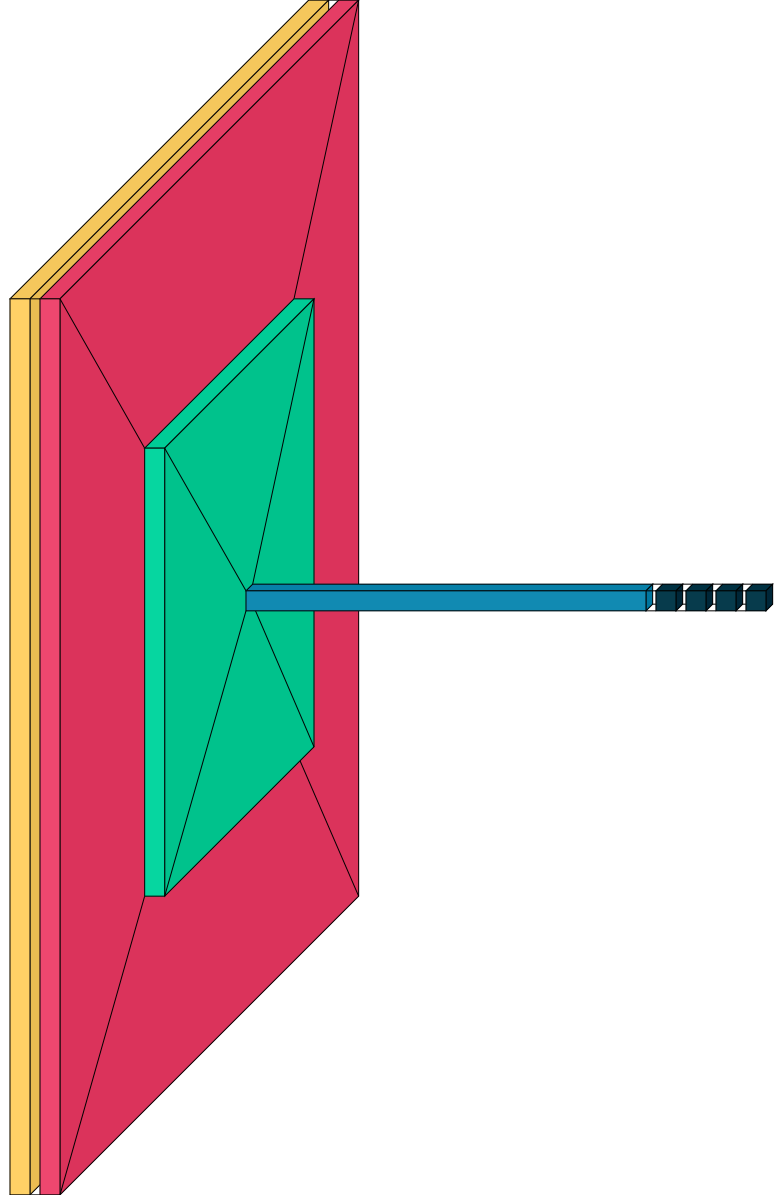

In [21]:
import visualkeras
visualkeras.layered_view(model5_3)

#**6.CNN Model with Data Augumentation layer and more dense layers**

#**Adam**

In [17]:
model6=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(4,activation="softmax")
])
model6.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [18]:
history = model6.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100


90/90 [==============================] - 24s 80ms/step - loss: 1.8560 - accuracy: 0.4285
Epoch 2/100
90/90 [==============================] - 8s 93ms/step - loss: 0.9424 - accuracy: 0.6253
Epoch 3/100
90/90 [==============================] - 9s 102ms/step - loss: 0.7941 - accuracy: 0.6921
Epoch 4/100
90/90 [==============================] - 8s 85ms/step - loss: 0.7080 - accuracy: 0.7179
Epoch 5/100
90/90 [==============================] - 9s 96ms/step - loss: 0.6498 - accuracy: 0.7466
Epoch 6/100
90/90 [==============================] - 7s 79ms/step - loss: 0.5877 - accuracy: 0.7780
Epoch 7/100
90/90 [==============================] - 8s 93ms/step - loss: 0.5599 - accuracy: 0.7798
Epoch 8/100
90/90 [==============================] - 7s 80ms/step - loss: 0.5087 - accuracy: 0.8039
Epoch 9/100
90/90 [==============================] - 8s 93ms/step - loss: 0.4968 - accuracy: 0.8154
Epoch 10/100
90/90 [==============================] - 9s 100ms/step - loss: 0.4480 - accuracy: 0.8305
Epoch 11

In [19]:
model6.evaluate(x_test_scaled,np.array(y_test))

30/30 [==============================] - 1s 18ms/step - loss: 0.6693 - accuracy: 0.8857


[0.6692590117454529, 0.8857442140579224]

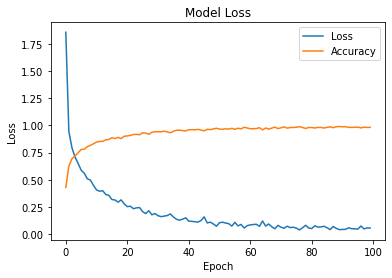

In [20]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

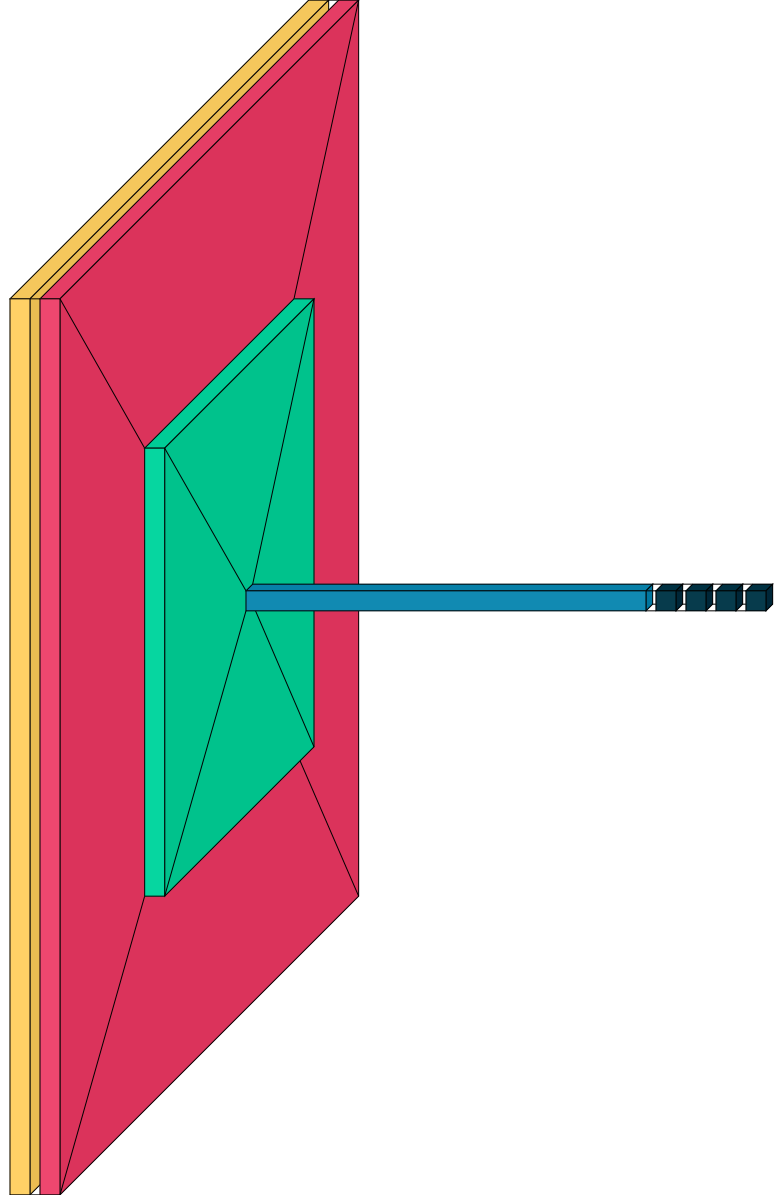

In [22]:
import visualkeras
visualkeras.layered_view(model6)

#**Adadelta**

In [16]:
model6_1=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(4,activation="softmax")
])
model6_1.compile(optimizer="adadelta",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [17]:
history = model6_1.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100


90/90 [==============================] - 25s 100ms/step - loss: 1.3075 - accuracy: 0.3541
Epoch 2/100
90/90 [==============================] - 8s 87ms/step - loss: 1.2796 - accuracy: 0.3614
Epoch 3/100
90/90 [==============================] - 8s 94ms/step - loss: 1.2508 - accuracy: 0.3646
Epoch 4/100
90/90 [==============================] - 7s 79ms/step - loss: 1.2318 - accuracy: 0.3750
Epoch 5/100
90/90 [==============================] - 8s 93ms/step - loss: 1.2155 - accuracy: 0.3869
Epoch 6/100
90/90 [==============================] - 7s 78ms/step - loss: 1.1949 - accuracy: 0.4170
Epoch 7/100
90/90 [==============================] - 9s 95ms/step - loss: 1.1807 - accuracy: 0.4394
Epoch 8/100
90/90 [==============================] - 10s 108ms/step - loss: 1.1677 - accuracy: 0.4463
Epoch 9/100
90/90 [==============================] - 8s 92ms/step - loss: 1.1574 - accuracy: 0.4656
Epoch 10/100
90/90 [==============================] - 8s 93ms/step - loss: 1.1422 - accuracy: 0.4743
Epoch 1

In [18]:
model6_1.evaluate(x_test_scaled,np.array(y_test))

30/30 [==============================] - 1s 21ms/step - loss: 0.8238 - accuracy: 0.6803


[0.8237671852111816, 0.6802935004234314]

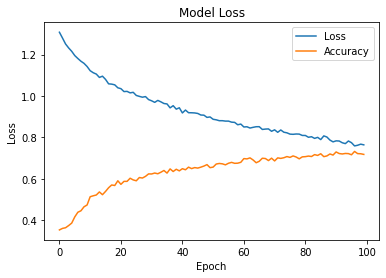

In [19]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

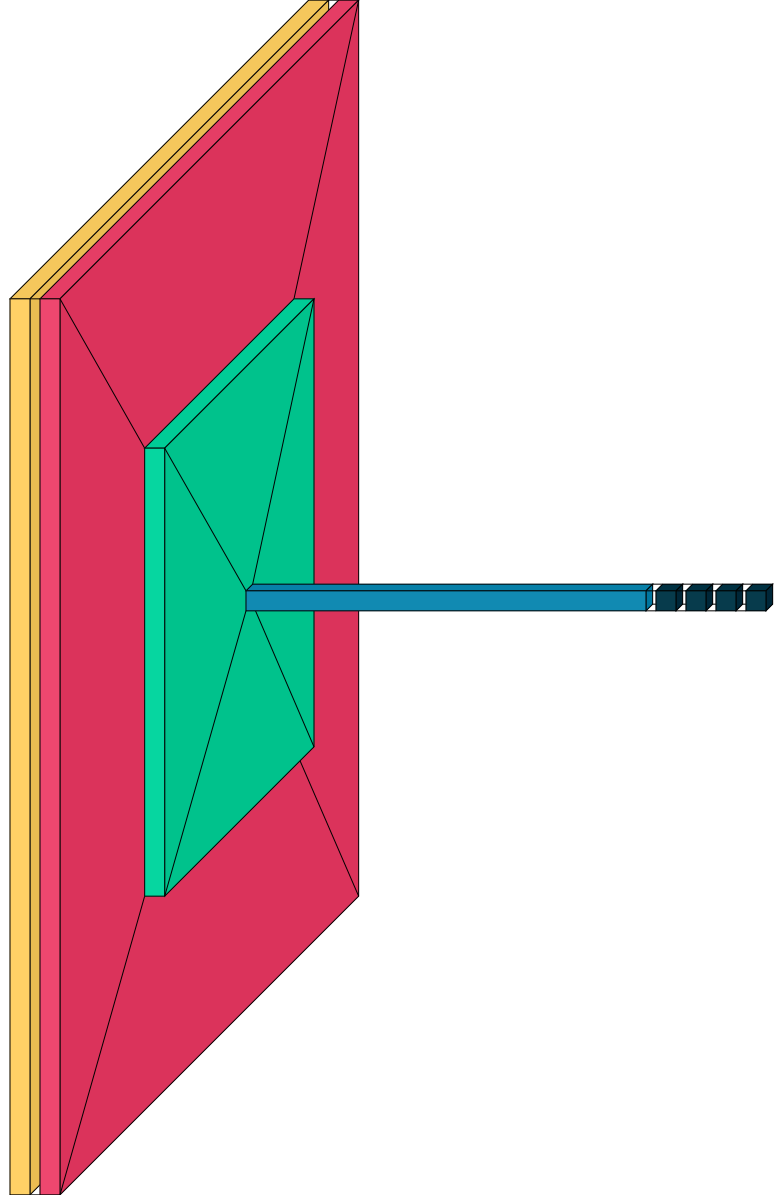

In [20]:
import visualkeras
visualkeras.layered_view(model6_1)

#**Adagrad**

In [16]:
model6_2=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(4,activation="softmax")
])
model6_2.compile(optimizer="adagrad",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [17]:
history = model6_2.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100


90/90 [==============================] - 25s 88ms/step - loss: 1.2974 - accuracy: 0.3670
Epoch 2/100
90/90 [==============================] - 8s 92ms/step - loss: 1.2343 - accuracy: 0.4051
Epoch 3/100
90/90 [==============================] - 7s 76ms/step - loss: 1.1951 - accuracy: 0.4404
Epoch 4/100
90/90 [==============================] - 8s 93ms/step - loss: 1.1508 - accuracy: 0.4827
Epoch 5/100
90/90 [==============================] - 7s 77ms/step - loss: 1.1062 - accuracy: 0.5211
Epoch 6/100
90/90 [==============================] - 8s 91ms/step - loss: 1.0635 - accuracy: 0.5313
Epoch 7/100
90/90 [==============================] - 7s 83ms/step - loss: 1.0085 - accuracy: 0.5844
Epoch 8/100
90/90 [==============================] - 8s 85ms/step - loss: 0.9862 - accuracy: 0.5952
Epoch 9/100
90/90 [==============================] - 8s 93ms/step - loss: 0.9676 - accuracy: 0.6022
Epoch 10/100
90/90 [==============================] - 7s 77ms/step - loss: 0.9167 - accuracy: 0.6316
Epoch 11/1

In [18]:
model6_2.evaluate(x_test_scaled,np.array(y_test))

30/30 [==============================] - 1s 17ms/step - loss: 0.5019 - accuracy: 0.8218


[0.5019038915634155, 0.8218029141426086]

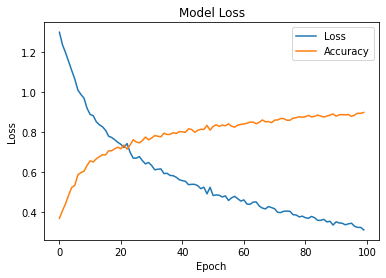

In [19]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

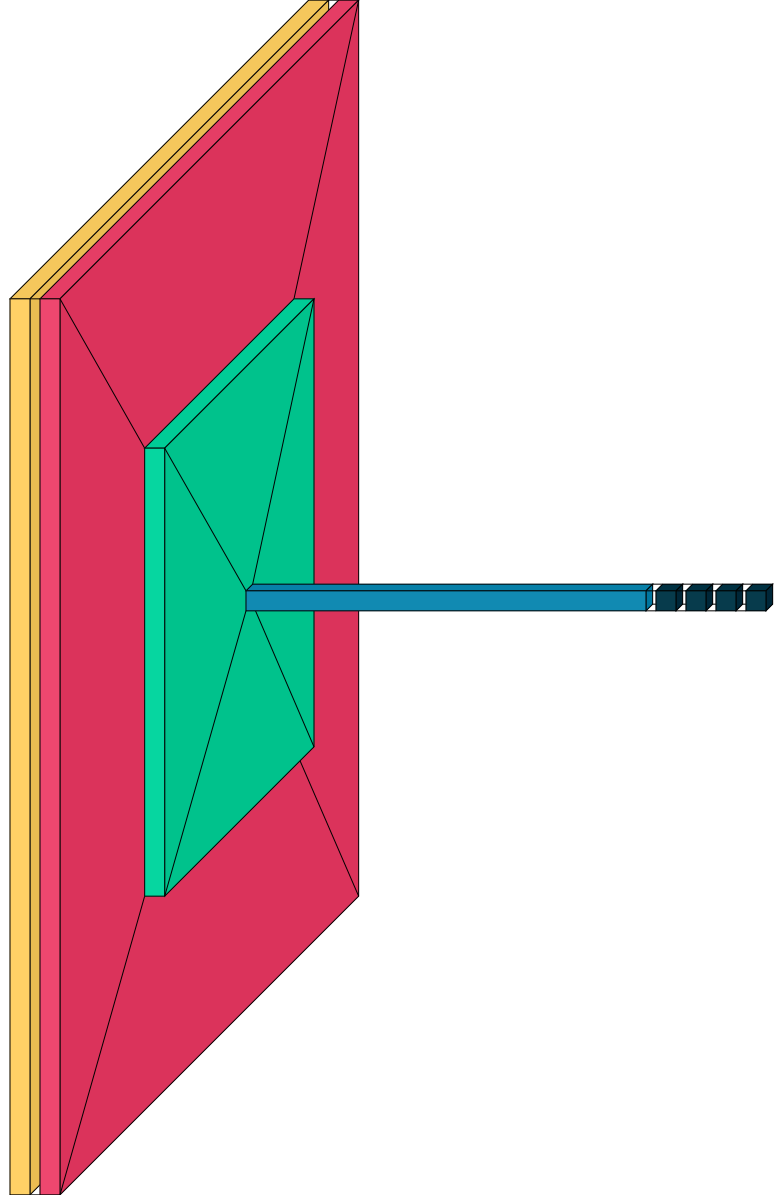

In [20]:
import visualkeras
visualkeras.layered_view(model6_2)

#**RMSprop**

In [18]:
model6_3=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(4,activation="softmax")
])
model6_3.compile(optimizer="RMSprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [19]:
history = model6_3.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100


90/90 [==============================] - 20s 81ms/step - loss: 1.5961 - accuracy: 0.4156
Epoch 2/100
90/90 [==============================] - 8s 93ms/step - loss: 0.9794 - accuracy: 0.5963
Epoch 3/100
90/90 [==============================] - 7s 77ms/step - loss: 0.7904 - accuracy: 0.6938
Epoch 4/100
90/90 [==============================] - 8s 93ms/step - loss: 0.6904 - accuracy: 0.7249
Epoch 5/100
90/90 [==============================] - 7s 83ms/step - loss: 0.6209 - accuracy: 0.7532
Epoch 6/100
90/90 [==============================] - 8s 88ms/step - loss: 0.5449 - accuracy: 0.7878
Epoch 7/100
90/90 [==============================] - 8s 94ms/step - loss: 0.5266 - accuracy: 0.7927
Epoch 8/100
90/90 [==============================] - 7s 79ms/step - loss: 0.5098 - accuracy: 0.8050
Epoch 9/100
90/90 [==============================] - 8s 94ms/step - loss: 0.4704 - accuracy: 0.8231
Epoch 10/100
90/90 [==============================] - 7s 78ms/step - loss: 0.4181 - accuracy: 0.8441
Epoch 11/1

In [20]:
model6_3.evaluate(x_test_scaled,np.array(y_test))

30/30 [==============================] - 1s 18ms/step - loss: 0.7688 - accuracy: 0.8952


[0.7687625288963318, 0.8951781988143921]

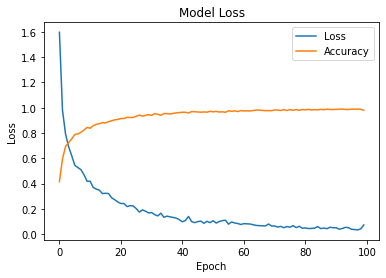

In [21]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

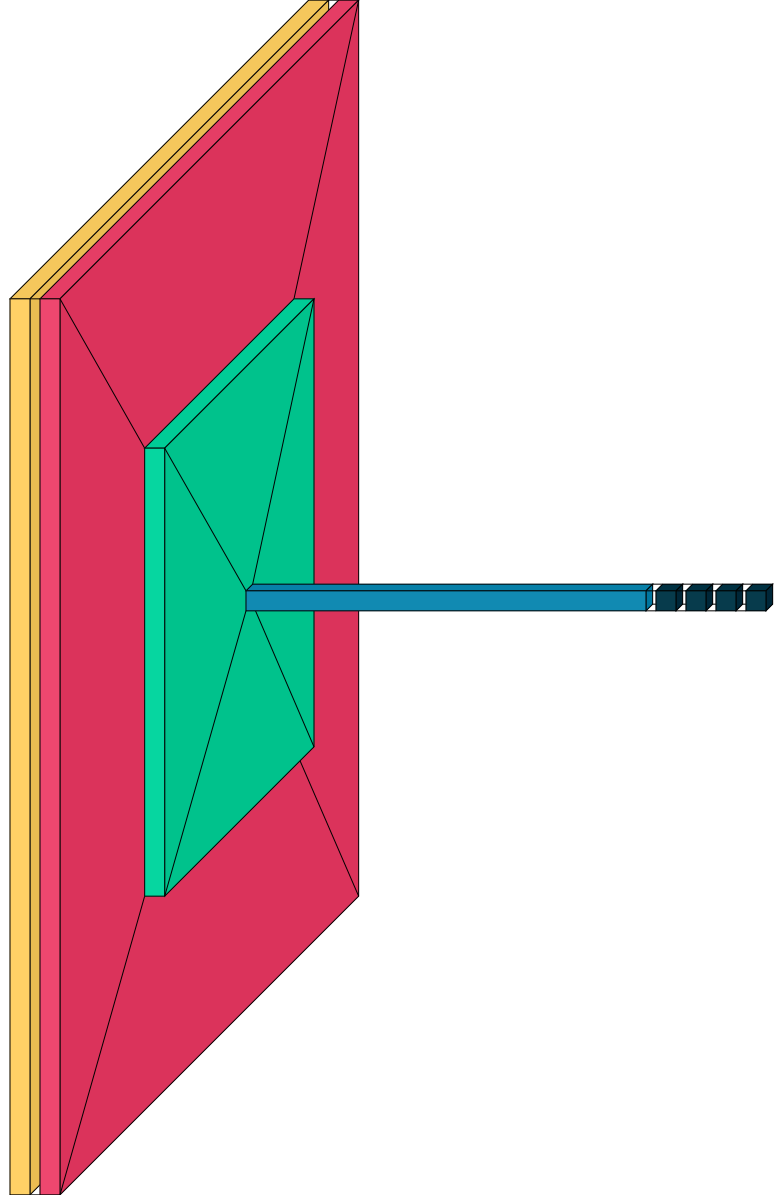

In [22]:
import visualkeras
visualkeras.layered_view(model6_3)